In [7]:
!which python

/Users/mdymshits/virtualenv/ir-threat/bin/python


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution1D, Flatten, BatchNormalization, Dropout
from keras import optimizers

In [29]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline


# Creating data
### Creating 1 batch of of the same ARMA

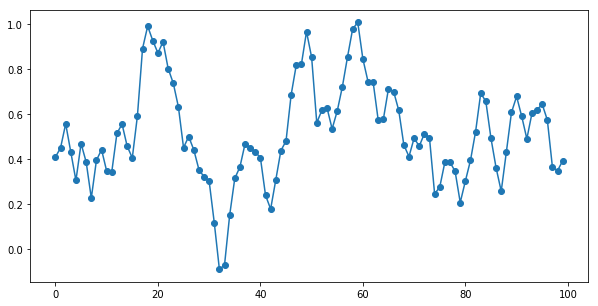

In [23]:



np.random.seed(123)
ar = np.array([.75, -.5])
ma = np.array([.25, .2])

ts = sm.tsa.arma_generate_sample(ar, ma, 100000)
ts = (ts + 2) / 4
plt.figure(figsize=(10,5))
plt.plot(ts[:100], marker='o');
ts_same = ts.reshape((1000, 100))

### Creating ARMA from different intialization

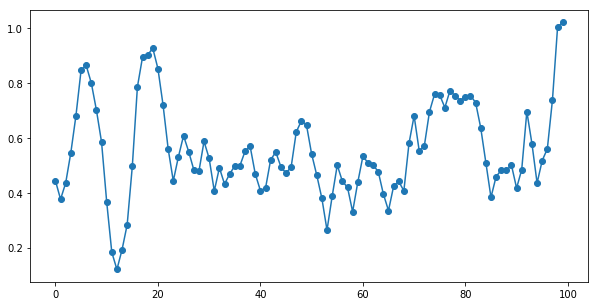

In [11]:

ts = []
np.random.seed(456)
for i in range(1000):

    ar = np.array([.75, -.5])
    ma = np.array([.25, .2])

    ts.append(sm.tsa.arma_generate_sample(ar, ma, 100))
    
ts_diff = np.array(ts)
ts_diff = (ts_diff + 2) / 4
plt.figure(figsize=(10,5))
plt.plot(ts_diff[0,:100], marker='o');

# Modeling
1-D Convolutional Network

In [22]:
def cnn_model(x_train, y_train, batch_size, epochs=10):
    
    
    input_dim = n_steps_for_train
    model = Sequential()
    model.add(Convolution1D(filters=6, kernel_size=4, input_shape=(input_dim ,1)))
    model.add(Flatten())
    model.add(Dense(units=64, kernel_initializer='normal'))
    # model.add(BatchNormalization())
    model.add(Activation('relu'))
    # model.add(Dropout(0.5))
    # model.add(Dense(units=60, actiivation='relu'))
    # model.add(Dense(units=40, activation='relu'))
    model.add(Dense(units=100-input_dim, activation='linear'))


    sgd = optimizers.SGD(lr=0.1)
    model.compile(loss='mean_squared_error',
                  optimizer='sgd',
                  metrics=['mae'])

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=.3, verbose=2)
    return model, history

```
n_steps_for_train = 60
n_samples = num_of_ts/2

x_train = data_numpy[:num_of_ts/2, :n_steps_for_train].reshape(n_samples, n_steps_for_train, 1) * 2000
y_train = data_numpy[:num_of_ts/2, n_steps_for_train:] * 2000

x_test = data_numpy[num_of_ts/2:, :n_steps_for_train].reshape(n_samples, n_steps_for_train, 1) * 2000
y_test = data_numpy[num_of_ts/2:, n_steps_for_train:] * 2000
```


In [15]:
n_samples = ts_same.shape[0]
n_steps_for_train = 75
x_train_same = ts_same[:n_samples/2, :n_steps_for_train].reshape(n_samples/2, n_steps_for_train, 1)
y_train_same = ts_same[:n_samples/2, n_steps_for_train:]

x_test_same = ts_same[n_samples/2:, :n_steps_for_train].reshape(n_samples/2, n_steps_for_train, 1)
y_test_same = ts_same[n_samples/2:, n_steps_for_train:]

model, history = cnn_model(x_train=x_train_same, y_train=y_train_same, batch_size=4)

Train on 350 samples, validate on 150 samples
Epoch 1/10
 - 0s - loss: 0.1924 - mean_absolute_error: 0.3670 - val_loss: 0.1009 - val_mean_absolute_error: 0.2604
Epoch 2/10
 - 0s - loss: 0.0721 - mean_absolute_error: 0.2172 - val_loss: 0.0526 - val_mean_absolute_error: 0.1836
Epoch 3/10
 - 0s - loss: 0.0471 - mean_absolute_error: 0.1743 - val_loss: 0.0431 - val_mean_absolute_error: 0.1651
Epoch 4/10
 - 0s - loss: 0.0423 - mean_absolute_error: 0.1654 - val_loss: 0.0411 - val_mean_absolute_error: 0.1613
Epoch 5/10
 - 0s - loss: 0.0412 - mean_absolute_error: 0.1632 - val_loss: 0.0407 - val_mean_absolute_error: 0.1604
Epoch 6/10
 - 0s - loss: 0.0408 - mean_absolute_error: 0.1623 - val_loss: 0.0405 - val_mean_absolute_error: 0.1599
Epoch 7/10
 - 0s - loss: 0.0404 - mean_absolute_error: 0.1613 - val_loss: 0.0402 - val_mean_absolute_error: 0.1594
Epoch 8/10
 - 0s - loss: 0.0402 - mean_absolute_error: 0.1609 - val_loss: 0.0399 - val_mean_absolute_error: 0.1587
Epoch 9/10
 - 0s - loss: 0.0400 - 

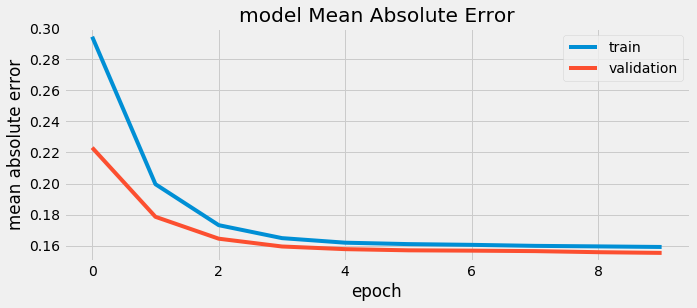

In [89]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 4))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
# plt.xlim(1,10)
plt.ylim(.15, .3)
plt.title('model Mean Absolute Error')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show();

```
y_pred_train = model.predict(x_train)

random_indexes = range(data.shape[1]/2)
random.shuffle(random_indexes)

for i in random_indexes[:5]:
    plt.figure()
    plt.plot(range(60), x_train[i], marker='o', markersize=3, label='input')
    plt.plot(range(60, 120), y_train[i], label='true')
    plt.plot(range(60, 120), y_pred_train[i], c='m', label='prediction')
    plt.title('train')
    plt.legend()
```

In [19]:
x_train_same[i].shape


(75, 1)

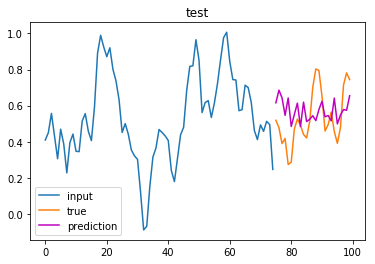

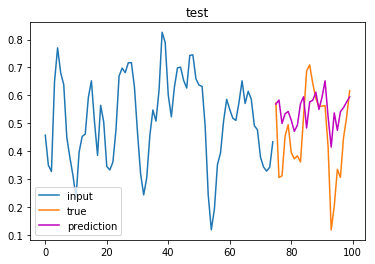

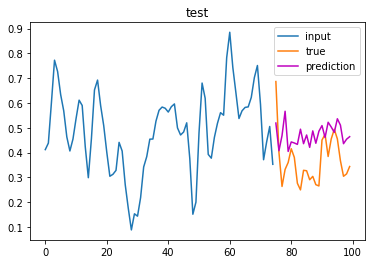

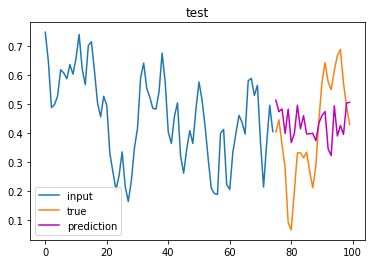

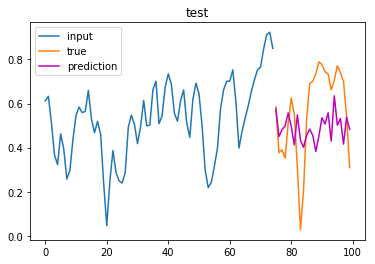

In [36]:
y_pred_test = model.predict(x_test_same)

for i in range(5):
    plt.figure()
    plt.plot(range(75), x_train_same[i], label='input')
    plt.plot(range(75, 100), y_test_same[i], label='true')
    plt.plot(range(75, 100), y_pred_test[i], c='m', label='prediction')
    plt.title('test')
    plt.legend()

## Comparing with Regular ARIMA


In [33]:
ts_same.shape

(1000, 100)

In [1]:
y_pred_test = model.predict(x_test_same)

for i in range(50):
    plt.figure()
    arma_res = sm.tsa.ARMA(x_train_same[i], order=(2,2)).fit()
    preds, stderr, ci = arma_res.forecast(25)
    plt.plot(range(75), x_train_same[i], label='input')
    plt.plot(range(75, 100), y_test_same[i], label='true')
    plt.plot(range(75, 100), preds, c='m', label='prediction')
    plt.title('test')
    plt.legend()

NameError: name 'model' is not defined